1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading data from given Dataset

In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("/content/Heart Disease data.csv")  # Replace with your actual file path

3. Exploring data

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
# Display the first few rows of the dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Summary statistics
print(data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

4. Data Cleaning

In [ ]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


5. Data Transformation nd Feature Engineering

In [ ]:
# Calculate age from birth year
current_year = 2023
data['birth_year'] = current_year - data['age']

# Create age groups
age_bins = [20, 40, 60, 80]
age_labels = ['20-39', '40-59', '60-79']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  birth_year age_group  
0   2     3       0        1971     40-59  
1   0     3       0        1970     40-59  
2   0     3       0        1953     60-79  
3   1     3       0        1962     60-79  
4   3     2       0        1961     60-79  


In [ ]:
# Save cleaned and transformed data to a new CSV
data.to_csv("cleaned_heart_disease_data.csv", index=False)

6. Aggregation and Grouping

In [ ]:
# Calculate heart disease rates by gender
heart_disease_by_gender = data.groupby('sex')['target'].mean()
print(heart_disease_by_gender)

# Calculate heart disease rates by age group
heart_disease_by_age = data.groupby('age_group')['target'].mean()
print(heart_disease_by_age)

sex
0    0.724359
1    0.420757
Name: target, dtype: float64
age_group
20-39    0.736842
40-59    0.550835
60-79    0.391586
Name: target, dtype: float64


7. Exploratory Data Analysis

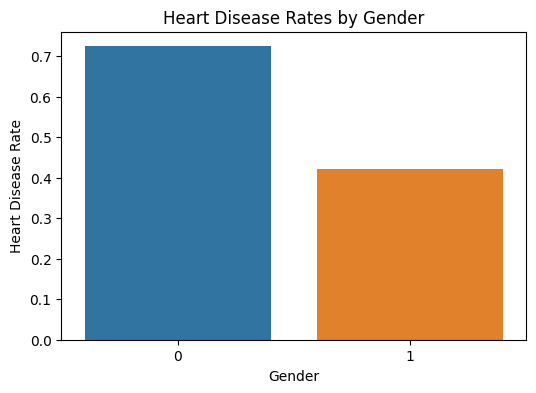

In [ ]:
# Visualization 1: Heart Disease Rates by Gender
plt.figure(figsize=(6,4))
sns.barplot(x=heart_disease_by_gender.index, y=heart_disease_by_gender.values)
plt.title("Heart Disease Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Heart Disease Rate")
plt.show()

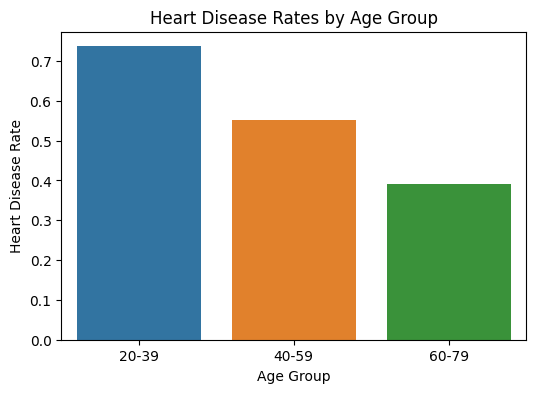

In [ ]:
# Visualization 2: Heart Disease Rates by Age Group
plt.figure(figsize=(6,4))
sns.barplot(x=heart_disease_by_age.index, y=heart_disease_by_age.values)
plt.title("Heart Disease Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Disease Rate")
plt.show()

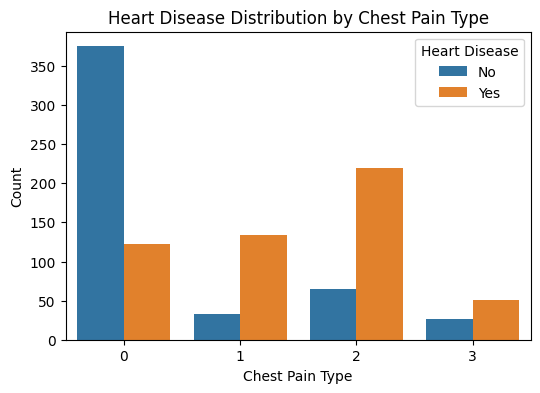

In [ ]:
#Visualization 3: Heart Disease Distribution by Chest Pain Type
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='cp', hue='target')
plt.title("Heart Disease Distribution by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

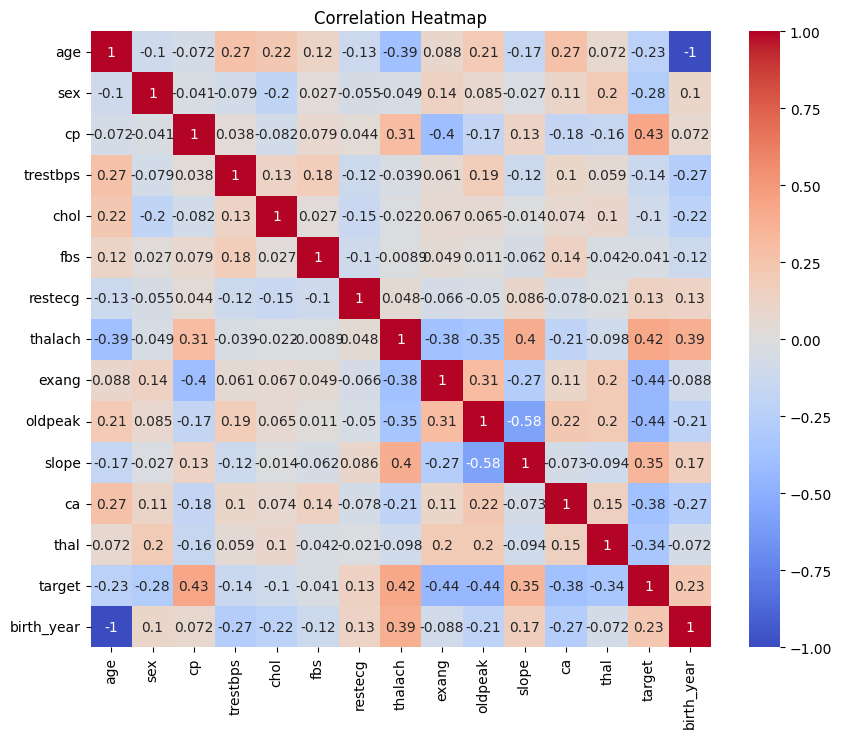

In [ ]:
#Visualization 4: Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

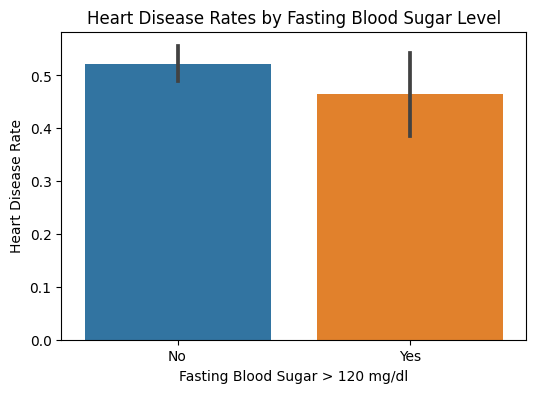

In [ ]:
#Visualization 5: Heart Disease Rates by Fasting Blood Sugar Level
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='fbs', y='target')
plt.title("Heart Disease Rates by Fasting Blood Sugar Level")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl")
plt.ylabel("Heart Disease Rate")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

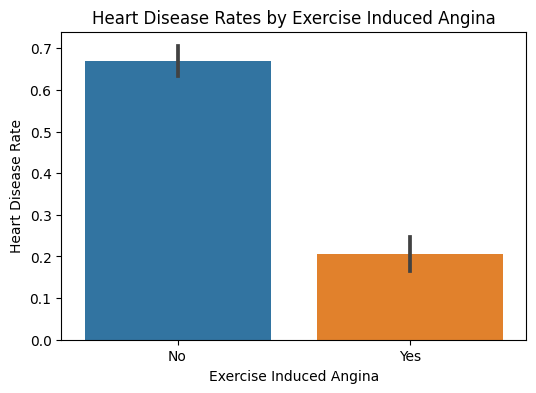

In [ ]:
#Visualization 6: Heart Disease Rates by Exercise Induced Angina
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='exang', y='target')
plt.title("Heart Disease Rates by Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Heart Disease Rate")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

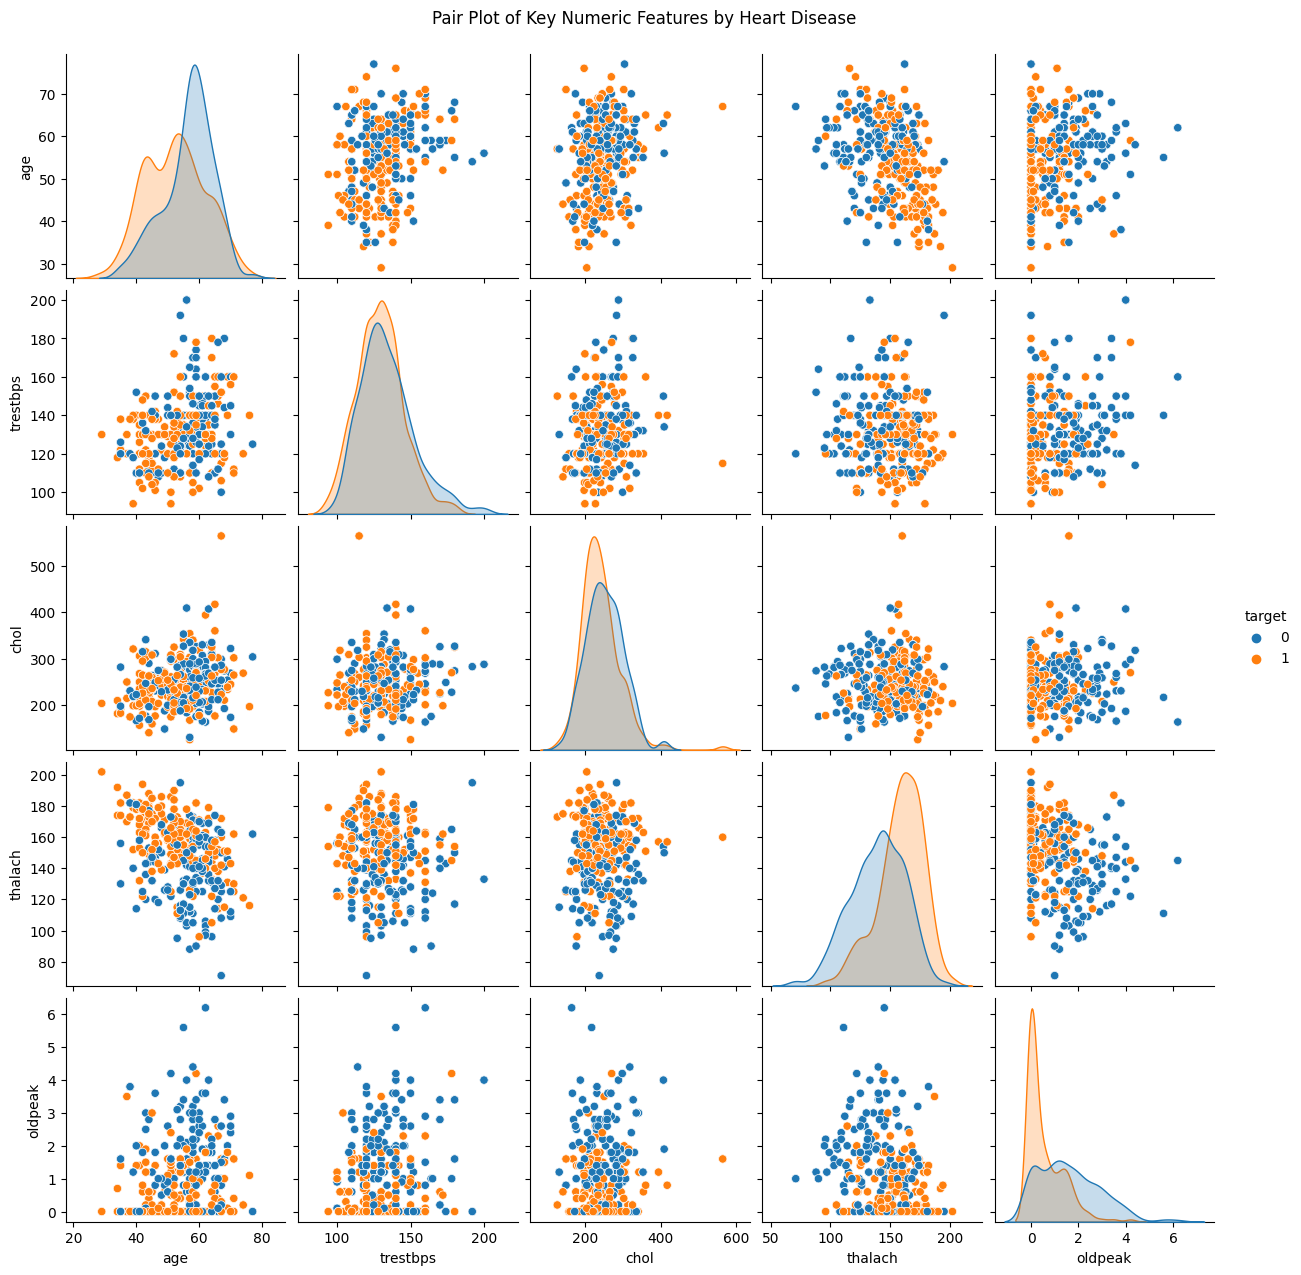

In [ ]:
#Visualization 7: Pair Plot for Key Features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(data=data, vars=numeric_features, hue='target', diag_kind='kde')
plt.suptitle("Pair Plot of Key Numeric Features by Heart Disease", y=1.02)
plt.show()


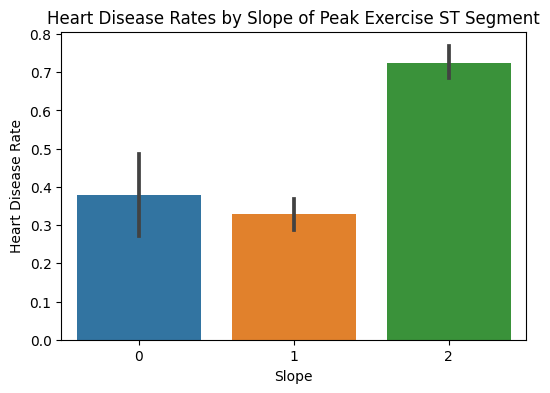

In [ ]:
#Visualization 8: Heart Disease Rates by Slope of the Peak Exercise ST Segment
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='slope', y='target')
plt.title("Heart Disease Rates by Slope of Peak Exercise ST Segment")
plt.xlabel("Slope")
plt.ylabel("Heart Disease Rate")
plt.show()











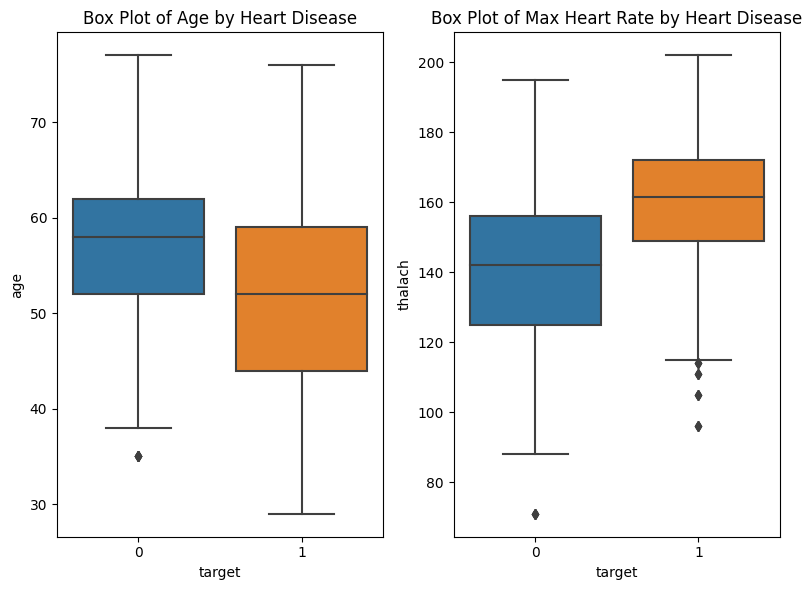

In [ ]:
#Visualization 9: Box Plots for Age and Max Heart Rate
# Box plots for age and maximum heart rate by heart disease presence
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='target', y='age')
plt.title("Box Plot of Age by Heart Disease")

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='target', y='thalach')
plt.title("Box Plot of Max Heart Rate by Heart Disease")

plt.tight_layout()
plt.show()

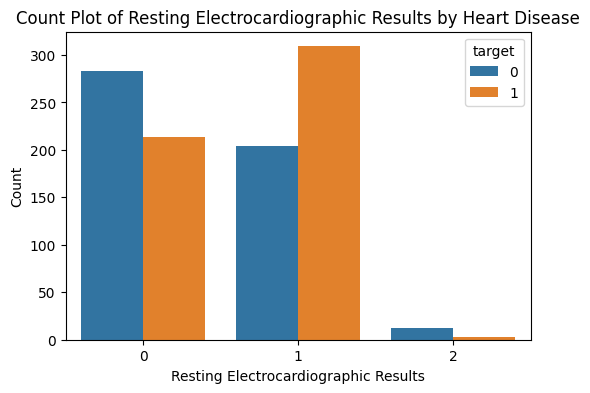

In [ ]:
#Visualization 10: Count Plot for Electrocardiographic Results
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='restecg', hue='target')
plt.title("Count Plot of Resting Electrocardiographic Results by Heart Disease")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.show()